1. Gather a dataset regarding your identified problem for the ASEAN Data Science Explorer. Make sure that the dataset includes multiple variables.
2. Load the dataset into pandas dataframe.
3. Prepare the data by applying appropriate data preprocessing techniques.
4. Analyze the data using descriptive analysis.
4. Perform correlation analysis.
5. Interpret the results based on the descriptive and correlation analysis.
6. Submit the PDF file.

**About this dataset**

This dataset provides an in-depth look into the global CO2 emissions at the country-level, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. It contains information on total emissions as well as from coal, oil, gas, cement production and flaring, and other sources. The data also provides a breakdown of per capita CO2 emission per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated. This dataset is essential for anyone who wants to get informed about their own environmental footprint or conduct research on international development trends

In [ ]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

coem = p.read_csv('/content/GCB2022v27_MtCO2_flat.csv')
gempcp = p.read_csv('/content/GCB2022v27_percapita_flat.csv')

In [ ]:
gempcp.drop('ISO 3166-1 alpha-3', axis=1,inplace=True)

In [ ]:
gempcp

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
63099,Global,2017,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,2018,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,2019,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,2020,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


In [ ]:
gempcp.dtypes

Country     object
Year         int64
Total      float64
Coal       float64
Oil        float64
Gas        float64
Cement     float64
Flaring    float64
Other      float64
dtype: object

In [ ]:
gpyf = gempcp[gempcp['Year'] >= 2015]

In [ ]:
gpyf

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
265,Afghanistan,2015,0.290076,0.084236,0.196261,0.008358,0.001220,0.000000,NaN
266,Afghanistan,2016,0.261795,0.083113,0.167284,0.009200,0.002198,0.000000,NaN
267,Afghanistan,2017,0.276852,0.096731,0.170436,0.008429,0.001256,0.000000,NaN
268,Afghanistan,2018,0.294876,0.104866,0.180470,0.007990,0.001550,0.000000,NaN
269,Afghanistan,2019,0.293401,0.104708,0.181177,0.006502,0.001015,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
63099,Global,2017,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,2018,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,2019,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,2020,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


In [ ]:
gpyf['Year'] = p.to_datetime(gpyf['Year'], format='%Y')

<ipython-input-295-3f9c03f7a32d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpyf['Year'] = p.to_datetime(gpyf['Year'], format='%Y')


In [ ]:
gpyf

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
265,Afghanistan,2015-01-01,0.290076,0.084236,0.196261,0.008358,0.001220,0.000000,NaN
266,Afghanistan,2016-01-01,0.261795,0.083113,0.167284,0.009200,0.002198,0.000000,NaN
267,Afghanistan,2017-01-01,0.276852,0.096731,0.170436,0.008429,0.001256,0.000000,NaN
268,Afghanistan,2018-01-01,0.294876,0.104866,0.180470,0.007990,0.001550,0.000000,NaN
269,Afghanistan,2019-01-01,0.293401,0.104708,0.181177,0.006502,0.001015,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
63099,Global,2017-01-01,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,2018-01-01,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,2019-01-01,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,2020-01-01,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


In [ ]:
asean_countries = ["Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", "Brunei Darussalam", "Viet Nam", "Lao PDR", "Myanmar", "Cambodia"]
gp_f = gpyf[gpyf['Country'].isin(asean_countries)]
# filter to only the ASEAN Countries

In [ ]:
gp_f # There are NaN values

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
8153,Brunei Darussalam,2015-01-01,16.451554,0.000000,3.903634,11.606575,0.000000,0.941345,NaN
8154,Brunei Darussalam,2016-01-01,17.917867,0.000000,4.233625,12.537382,0.000000,1.146860,NaN
8155,Brunei Darussalam,2017-01-01,21.635841,0.000000,4.479134,15.855795,0.000000,1.300912,NaN
8156,Brunei Darussalam,2018-01-01,21.517344,0.000000,4.388911,16.179891,0.000000,0.948541,NaN
8157,Brunei Darussalam,2019-01-01,23.941461,0.828074,8.163635,13.633940,0.000000,1.315813,NaN
...,...,...,...,...,...,...,...,...,...
61467,Viet Nam,2017-01-01,2.478286,1.150890,0.663274,0.190114,0.454471,0.019537,NaN
61468,Viet Nam,2018-01-01,2.889164,1.420792,0.735006,0.195487,0.522971,0.014908,NaN
61469,Viet Nam,2019-01-01,3.560416,1.998842,0.796989,0.197401,0.551855,0.015329,NaN
61470,Viet Nam,2020-01-01,3.403044,1.989463,0.675848,0.175673,0.548774,0.013286,NaN


In [ ]:
gp_fg = gp_f.groupby(['Country','Year']).mean() # Grouped and summary of Emissions
gp_fg

Total      Coal       Oil        Gas  \
Country           Year                                                   
Brunei Darussalam 2015-01-01  16.451554  0.000000  3.903634  11.606575   
                  2016-01-01  17.917867  0.000000  4.233625  12.537382   
                  2017-01-01  21.635841  0.000000  4.479134  15.855795   
                  2018-01-01  21.517344  0.000000  4.388911  16.179891   
                  2019-01-01  23.941461  0.828074  8.163635  13.633940   
...                                 ...       ...       ...        ...   
Viet Nam          2017-01-01   2.478286  1.150890  0.663274   0.190114   
                  2018-01-01   2.889164  1.420792  0.735006   0.195487   
                  2019-01-01   3.560416  1.998842  0.796989   0.197401   
                  2020-01-01   3.403044  1.989463  0.675848   0.175673   
                  2021-01-01   3.344827  2.016234  0.621885   0.140346   

                                Cement   Flaring  Other  
Country           Year                                   
Brunei Darussalam 2015-01-01  0.000000  0.941345    NaN  
                  2016-01-01  0.000000  1.146860    NaN  
                  2017-01-01  0.000000  1.300912    NaN  
                  2018-01-01  0.000000  0.948541    NaN  
                  2019-01-01  0.000000  1.315813    NaN  
...                                ...       ...    ...  
Viet Nam          2017-01-01  0.454471  0.019537    NaN  
                  2018-01-01  0.522971  0.014908    NaN  
                  2019-01-01  0.551855  0.015329    NaN  
                  2020-01-01  0.548774  0.013286    NaN  
                  2021-01-01  0.555266  0.011096    NaN  

[63 rows x 7 columns]

In [ ]:
gp_fg.drop('Other',axis=1,inplace=True) # We remove Other because it's just NaN values

In [ ]:
gp_fg

Total      Coal       Oil        Gas  \
Country           Year                                                   
Brunei Darussalam 2015-01-01  16.451554  0.000000  3.903634  11.606575   
                  2016-01-01  17.917867  0.000000  4.233625  12.537382   
                  2017-01-01  21.635841  0.000000  4.479134  15.855795   
                  2018-01-01  21.517344  0.000000  4.388911  16.179891   
                  2019-01-01  23.941461  0.828074  8.163635  13.633940   
...                                 ...       ...       ...        ...   
Viet Nam          2017-01-01   2.478286  1.150890  0.663274   0.190114   
                  2018-01-01   2.889164  1.420792  0.735006   0.195487   
                  2019-01-01   3.560416  1.998842  0.796989   0.197401   
                  2020-01-01   3.403044  1.989463  0.675848   0.175673   
                  2021-01-01   3.344827  2.016234  0.621885   0.140346   

                                Cement   Flaring  
Country           Year                            
Brunei Darussalam 2015-01-01  0.000000  0.941345  
                  2016-01-01  0.000000  1.146860  
                  2017-01-01  0.000000  1.300912  
                  2018-01-01  0.000000  0.948541  
                  2019-01-01  0.000000  1.315813  
...                                ...       ...  
Viet Nam          2017-01-01  0.454471  0.019537  
                  2018-01-01  0.522971  0.014908  
                  2019-01-01  0.551855  0.015329  
                  2020-01-01  0.548774  0.013286  
                  2021-01-01  0.555266  0.011096  

[63 rows x 6 columns]

In [ ]:
gp_fgs = gp_fg.sort_values(by=['Total'], ascending=False) # Show the highest CO2 Contributor and when

In [ ]:
gpfp = gp_f.set_index('Year')
gpfp

,Country,Total,Coal,Oil,Gas,Cement,Flaring,Other
Year,,,,,,,,
2015-01-01,Brunei Darussalam,16.451554,0.000000,3.903634,11.606575,0.000000,0.941345,NaN
2016-01-01,Brunei Darussalam,17.917867,0.000000,4.233625,12.537382,0.000000,1.146860,NaN
2017-01-01,Brunei Darussalam,21.635841,0.000000,4.479134,15.855795,0.000000,1.300912,NaN
2018-01-01,Brunei Darussalam,21.517344,0.000000,4.388911,16.179891,0.000000,0.948541,NaN
2019-01-01,Brunei Darussalam,23.941461,0.828074,8.163635,13.633940,0.000000,1.315813,NaN
...,...,...,...,...,...,...,...,...
2017-01-01,Viet Nam,2.478286,1.150890,0.663274,0.190114,0.454471,0.019537,NaN
2018-01-01,Viet Nam,2.889164,1.420792,0.735006,0.195487,0.522971,0.014908,NaN
2019-01-01,Viet Nam,3.560416,1.998842,0.796989,0.197401,0.551855,0.015329,NaN


<Axes: >

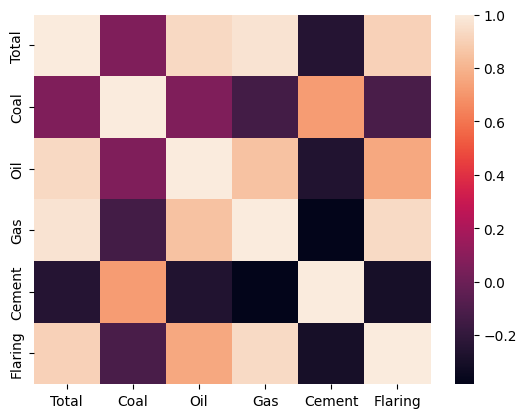

In [ ]:
cor = gp_fg.corr()
sns.heatmap()

In [ ]:
# gp_fg.describe()